# Project 5: Application - Twitter data

In [0]:
import numpy as np
import pandas as pd
import os
import json
import datetime
import pytz
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
os.getcwd()

'/content'

## Part 1: Popularity Prediction

### 1. A first look at the data


QUESTION 1: Report the following statistics for each hashtag, i.e. each  le:  
*  Average number of tweets per hour  
*  Average number of followers of users posting the tweets per tweet (to make it simple, we average over the number of tweets; if a users posted twice, we count the user and the user’s followers twice as well)  
*  Average number of retweets per tweet  

In [0]:
def get_file(file_path):
  timestamp = []
  tweet = []
  retweet = []
  followers = []
  time = []
  month = []
  day = []
  hour = []
  pst_tz = pytz.timezone('America/Los_Angeles')

  with open(file_path, 'r') as json_file:  
    for line in json_file:
      data = json.loads(line)
      timestamp.append(data['citation_date'])
      tweet.append(1)
      retweet.append(data['metrics']['citations']['total'])
      followers.append(data['author']['followers'])
      time.append(datetime.datetime.fromtimestamp(data['citation_date'], pst_tz))
      month.append(datetime.datetime.fromtimestamp(data['citation_date'], pst_tz).month)
      day.append(datetime.datetime.fromtimestamp(data['citation_date'], pst_tz).day)
      hour.append(datetime.datetime.fromtimestamp(data['citation_date'], pst_tz).hour)
    df = pd.DataFrame({
        'tweet': tweet,
        'timestamp': timestamp,
        'retweet': retweet,
        'followers': followers,
        'time': time,
        'month': month,
        'day': day,
        'hour': hour
    }, columns = ['tweet', 'timestamp', 'retweet', 'followers', 'time', 'month', 'day', 'hour'])
    
    df.to_csv('./ECE219_tweet_data/extracted'+file_path[28:-4]+'.csv', index = False)
    

In [0]:
get_file('./ECE219_tweet_data/tweets_#superbowl.txt')

In [0]:
get_file('./ECE219_tweet_data/tweets_#gohawks.txt')

In [0]:
get_file('./ECE219_tweet_data/tweets_#gopatriots.txt')

In [0]:
get_file('./ECE219_tweet_data/tweets_#nfl.txt')

In [0]:
get_file('./ECE219_tweet_data/tweets_#patriots.txt')

In [0]:
get_file('./ECE219_tweet_data/tweets_#sb49.txt')

In [0]:
superbowl = pd.read_csv('./ECE219_tweet_data/extractedsuperbowl.csv')

In [0]:
superbowl.head()

,tweet,timestamp,retweet,followers,time,month,day,hour
0,1,1421468497,2,22.0,2015-01-16 20:21:37-08:00,1,16,20
1,1,1421467579,15,22.0,2015-01-16 20:06:19-08:00,1,16,20
2,1,1421266957,2,858.0,2015-01-14 12:22:37-08:00,1,14,12
3,1,1421261298,2,14335.0,2015-01-14 10:48:18-08:00,1,14,10
4,1,1421316031,7,1143.0,2015-01-15 02:00:31-08:00,1,15,2


In [0]:
gohawks = pd.read_csv('./ECE219_tweet_data/extractedgohawks.csv')

In [0]:
gopatriots = pd.read_csv('./ECE219_tweet_data/extractedgopatriots.csv')

In [0]:
nfl = pd.read_csv('./ECE219_tweet_data/extractednfl.csv')

In [0]:
patriots = pd.read_csv('./ECE219_tweet_data/extractedpatriots.csv')

In [0]:
sb49 = pd.read_csv('./ECE219_tweet_data/extractedsb49.csv')

In [0]:
#timestamp = a scalar real number which represents the number of seconds that 
#            have passed since the beginning of 00:00:00 UTC thurusday, 1 Jan 1970.
def hashtag_stat(data):
  tweet_hr = len(data['tweet'])/((max(data['timestamp']) - min(data['timestamp']))/3600)
  follower_tweet = sum(data['followers']) / len(data['tweet'])
  retweet_tweet = sum(data['retweet']) / len(data['tweet'])
  print('Average number of tweets per hour:', round(tweet_hr, 2))
  print('Average number of followers of users posint the tweets per tweet:', round(follower_tweet, 2))
  print('Average number of retweets per tweet:', round(retweet_tweet, 2))

In [0]:
hashtag_stat(superbowl)

Average number of tweets per hour: 2072.12
Average number of followers of users posint the tweets per tweet: 8814.97
Average number of retweets per tweet: 2.39


In [0]:
hashtag_stat(gohawks)

Average number of tweets per hour: 292.49
Average number of followers of users posint the tweets per tweet: 2217.92
Average number of retweets per tweet: 2.01


In [0]:
hashtag_stat(gopatriots)

Average number of tweets per hour: 40.95
Average number of followers of users posint the tweets per tweet: 1427.25
Average number of retweets per tweet: 1.41


In [0]:
hashtag_stat(nfl)

Average number of tweets per hour: 397.02
Average number of followers of users posint the tweets per tweet: 4662.38
Average number of retweets per tweet: 1.53


In [0]:
hashtag_stat(patriots)

Average number of tweets per hour: 750.89
Average number of followers of users posint the tweets per tweet: 3280.46
Average number of retweets per tweet: 1.79


In [0]:
hashtag_stat(sb49)

Average number of tweets per hour: 1276.86
Average number of followers of users posint the tweets per tweet: 10374.16
Average number of retweets per tweet: 2.53


QUESTION 2: Plot “number of tweets in hour” over time for #SuperBowl and #NFL (a histogram with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named as tweet_[#hashtag].txt.

In [0]:
import matplotlib.pyplot as plt

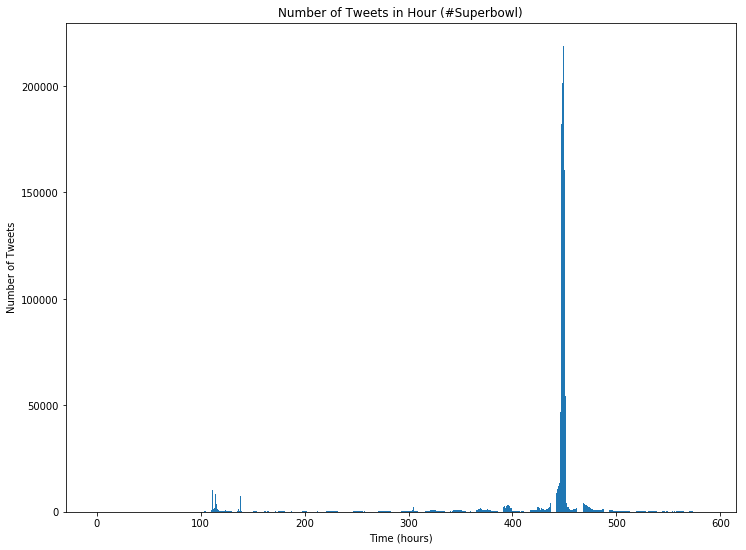

In [0]:
tweet_hr = np.zeros(int((max(superbowl['timestamp'])-min(superbowl['timestamp']))/3600+1))
start_time = min(superbowl['timestamp'])

for t in superbowl['timestamp']:
  tweet_hr[int((t - start_time)/3600)] = tweet_hr[int((t - start_time)/3600)] + 1

plt.figure(figsize = (12, 9))
plt.bar(range(0, len(tweet_hr)), tweet_hr)
plt.xlabel('Time (hours)')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets in Hour (#Superbowl)')
plt.show()

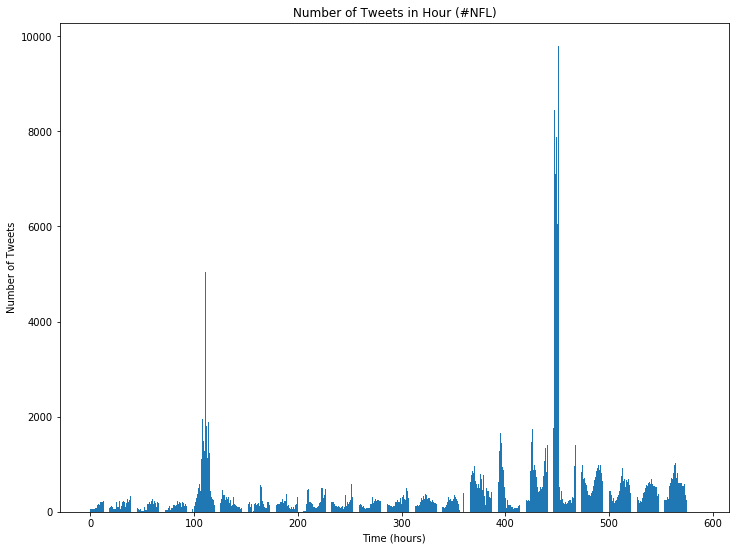

In [0]:
tweet_hr = np.zeros(int((max(nfl['timestamp'])-min(nfl['timestamp']))/3600+1))
start_time = min(nfl['timestamp'])

for t in nfl['timestamp']:
  tweet_hr[int((t - start_time)/3600)] = tweet_hr[int((t - start_time)/3600)] + 1

plt.figure(figsize = (12, 9))
plt.bar(range(0, len(tweet_hr)), tweet_hr)
plt.xlabel('Time (hours)')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets in Hour (#NFL)')
plt.show()

### 2. Linear regression

Create time windows from the data to extract features. Here, use 1-hour time window (00:00 - 01:00 am, 01:00 - 02:00 am, etc.) and calculate the features in each time window, resulting in
<# of hours> data points.
For each hashtag data  file,  fit a linear regression model using the following 5 features to predict number of tweets in the next hour, with features extracted from tweet data in the previous hour.
The features you should use are:

*  Number of tweets
*  Total number of retweets
*  Sum of the number of followers of the users posting the hashtag
*  Maximum number of followers of the users posting the hashtag
*  Time of the day (which could take 24 values that represent hours of the day with respect to a given time zone)  

For each hashtag, you should train a separate model.

In [0]:
!pip install statsmodels

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
import statsmodels.api as sm
from scipy import stats

In [0]:
def ols_tweets(data):
  df = data.groupby(by=['month', 'day', 'hour']).agg({'tweet': np.sum, 
                                                      'retweet': np.sum,
                                                      'followers':{
                                                          'sum_followers': np.sum,
                                                          'max_followers': max}
                                                     })
  df = df.reset_index(level=2)
  y = df.values[1:,1]
  X = df.values[:-1,:]
  X = sm.add_constant(X)
  results = sm.OLS(y, X).fit()
  print('==============================================================================')
  print(results.summary())
  print('MSE = ',results.mse_model)
  

QUESTION 3: For each of your models, report your model’s Mean Squared Error (MSE) and R-squared measure. Also, analyse the significance of each feature using the t-test and p-value. You may use the OLS in the libarary statsmodels in Python.

In [0]:
ols_tweets(superbowl)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     463.5
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          6.72e-200
Time:                        14:01:51   Log-Likelihood:                -6039.9
No. Observations:                 586   AIC:                         1.209e+04
Df Residuals:                     580   BIC:                         1.212e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -149.5572    605.382     -0.247      0.8

In [0]:
ols_tweets(gohawks)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     102.3
Date:                Tue, 19 Mar 2019   Prob (F-statistic):           1.10e-76
Time:                        14:01:54   Log-Likelihood:                -4663.7
No. Observations:                 569   AIC:                             9339.
Df Residuals:                     563   BIC:                             9365.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.5479     72.676      1.370      0.1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [0]:
ols_tweets(gopatriots)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     145.9
Date:                Tue, 19 Mar 2019   Prob (F-statistic):           1.37e-90
Time:                        14:01:57   Log-Likelihood:                -2932.2
No. Observations:                 440   AIC:                             5876.
Df Residuals:                     434   BIC:                             5901.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2200     18.907      0.699      0.4

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [0]:
ols_tweets(nfl)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     152.9
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          3.58e-103
Time:                        14:01:59   Log-Likelihood:                -4467.0
No. Observations:                 582   AIC:                             8946.
Df Residuals:                     576   BIC:                             8972.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.4288     43.356      2.916      0.0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [0]:
ols_tweets(patriots)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     233.8
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          1.91e-136
Time:                        14:02:02   Log-Likelihood:                -5361.4
No. Observations:                 586   AIC:                         1.073e+04
Df Residuals:                     580   BIC:                         1.076e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.1751    183.925      0.980      0.3

In [0]:
ols_tweets(sb49)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     435.6
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          4.54e-185
Time:                        14:02:04   Log-Likelihood:                -5231.3
No. Observations:                 536   AIC:                         1.047e+04
Df Residuals:                     530   BIC:                         1.050e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        235.2366    365.931      0.643      0.5

### Feature analysis

In [0]:
def get_file_new_feature(file_path):
  timestamp = []
  tweet = []
  retweet = []
  followers = []
  time = []
  month = []
  day = []
  hour = []
  location = []
  favorited = []
  followers_count = []
  listed_count = []
  statuses_count = []
  hashtag_count = []
  rank_score = []
  pst_tz = pytz.timezone('America/Los_Angeles')

  with open(file_path, 'r') as json_file:  
    for line in json_file:
      data = json.loads(line)
      timestamp.append(data['citation_date'])
      tweet.append(1)
      retweet.append(data['metrics']['citations']['total'])
      followers.append(data['author']['followers'])
      time.append(datetime.datetime.fromtimestamp(data['citation_date'], pst_tz))
      month.append(datetime.datetime.fromtimestamp(data['citation_date'], pst_tz).month)
      day.append(datetime.datetime.fromtimestamp(data['citation_date'], pst_tz).day)
      hour.append(datetime.datetime.fromtimestamp(data['citation_date'], pst_tz).hour)
      location.append(data['tweet']['user']['location'])
      favorited.append(data['tweet']['favorited'])
      followers_count.append(data['tweet']['user']['followers_count'])
      listed_count.append(data['tweet']['user']['listed_count'])
      statuses_count.append(data['tweet']['user']['statuses_count'])
      hashtag_count.append(data['title'].count('#'))
      rank_score.append(data['metrics']['ranking_score'])
    df = pd.DataFrame({
        'tweet': tweet,
        'timestamp': timestamp,
        'retweet': retweet,
        'followers': followers,
        'time': time,
        'month': month,
        'day': day,
        'hour': hour,
        'location': location,
        'favorited': favorited,
        'follwers_count': followers_count,
        'listed_count': listed_count,
        'statuses_count': statuses_count,
        'hashtag_count': hashtag_count,
        'rank_score': rank_score
    }, columns = ['tweet', 'timestamp', 'retweet', 'followers', 'time', 'month', 'day', 'hour',
                 'location','favorited','followers_count','listed_count', 'statuses_count', 'hashtag_count','rank_score'])
    
    df.to_csv('./ECE219_tweet_data/extractedfeature'+file_path[27:-4]+'.csv', index = False,encoding='utf-8')
    

In [0]:
get_file_new_feature('./ECE219_tweet_data/tweets_#gohawks.txt')

In [0]:
get_file_new_feature('./ECE219_tweet_data/tweets_#gopatriots.txt')

In [0]:
get_file_new_feature('./ECE219_tweet_data/tweets_#nfl.txt')

In [0]:
get_file_new_feature('./ECE219_tweet_data/tweets_#patriots.txt')

In [0]:
get_file_new_feature('./ECE219_tweet_data/tweets_#sb49.txt')

In [0]:
get_file_new_feature('./ECE219_tweet_data/tweets_#superbowl.txt')

In [0]:
gohawks1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#gohawks.csv')
gopatriots1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#gopatriots.csv')
nfl1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#nfl.csv')
patriots1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#patriots.csv')
sb491 = pd.read_csv('./ECE219_tweet_data/extractedfeature#sb49.csv')
superbowl1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#superbowl.csv')

In [0]:
superbowl1.head()

,tweet,timestamp,retweet,followers,time,month,day,hour,location,favorited,followers_count,listed_count,statuses_count,hashtag_count,rank_score
0,1,1421468497,2,22.0,2015-01-16 20:21:37-08:00,1,16,20,NaN,False,NaN,21.0,82505,8,3.229207
1,1,1421467579,15,22.0,2015-01-16 20:06:19-08:00,1,16,20,k-town Ak.,False,NaN,2.0,427,6,4.033474
2,1,1421266957,2,858.0,2015-01-14 12:22:37-08:00,1,14,12,Brazil,False,NaN,2.0,5463,5,6.944451
3,1,1421261298,2,14335.0,2015-01-14 10:48:18-08:00,1,14,10,Iowa,False,NaN,8.0,60,4,6.660640
4,1,1421316031,7,1143.0,2015-01-15 02:00:31-08:00,1,15,2,Cloud 9,False,NaN,103.0,4598,2,3.856183


In [0]:
gohawks1['followers_count']=gohawks1['followers_count'].fillna(0)
gohawks1['listed_count']=gohawks1['listed_count'].fillna(0)
gohawks1['statuses_count']=gohawks1['statuses_count'].fillna(0)

In [0]:
gopatriots1['followers_count']=gopatriots1['followers_count'].fillna(0)
gopatriots1['listed_count']=gopatriots1['listed_count'].fillna(0)
gopatriots1['statuses_count']=gopatriots1['statuses_count'].fillna(0)

In [0]:
nfl1['followers_count']=nfl1['followers_count'].fillna(0)
nfl1['listed_count']=nfl1['listed_count'].fillna(0)
nfl1['statuses_count']=nfl1['statuses_count'].fillna(0)

In [0]:
patriots1['followers_count']=patriots1['followers_count'].fillna(0)
patriots1['listed_count']=patriots1['listed_count'].fillna(0)
patriots1['statuses_count']=patriots1['statuses_count'].fillna(0)

In [0]:
sb491['followers_count']=sb491['followers_count'].fillna(0)
sb491['listed_count']=sb491['listed_count'].fillna(0)
sb491['statuses_count']=sb491['statuses_count'].fillna(0)

In [0]:
superbowl1['followers_count']=superbowl1['followers_count'].fillna(0)
superbowl1['listed_count']=superbowl1['listed_count'].fillna(0)
superbowl1['statuses_count']=superbowl1['statuses_count'].fillna(0)

QUESTION 4: Design a regression model using any features from the papers you and or other new features you may  find useful for this problem. Fit your model on the data of each hashtag and report  fitting MSE and significance of features.

In [0]:
def df_features(data):
  df = data.groupby(by=['month', 'day', 'hour']).agg({'tweet': np.sum, 
                                                      'retweet': np.sum,
                                                      'followers':max,
                                                      'listed_count':{
                                                          'sum_listed_count': np.sum,
                                                          'max_listed_count': max
                                                      },
                                                      'statuses_count':max,
                                                      'hashtag_count': sum,
                                                      'rank_score': max
                                                     })
  df = df.reset_index(level=2)
  y = df.values[1:,1]
  X = df.values[:-1,1:]
  X = sm.add_constant(X)
  #df_X = pd.concat([df['tweet'].iloc[1:].reset_index(drop=True), df.iloc[:-1].reset_index(drop=True)], axis=1)  #smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region)', data=df).fit()
  #df_X.columns = ['y', 'hour', 'tweet', 'retweet', 'sum_followers', 'max_followers', 
  #              'sum_listed_count', 'max_listed_count','sum_statuses_count', 'max_statuses_count']
  #return df_X

  results = sm.OLS(y, X).fit()
  print('==============================================================================')
  print(results.summary())
  print('MSE = ',results.mse_model)

In [0]:
df_features(superbowl1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     390.1
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          4.46e-227
Time:                        16:29:44   Log-Likelihood:                -5966.9
No. Observations:                 586   AIC:                         1.195e+04
Df Residuals:                     577   BIC:                         1.199e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3802.7864   2628.994      1.446      0.1

In [0]:
df_features(gohawks1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     96.67
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          2.36e-100
Time:                        16:29:56   Log-Likelihood:                -4600.8
No. Observations:                 569   AIC:                             9220.
Df Residuals:                     560   BIC:                             9259.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -354.2746    191.951     -1.846      0.0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [0]:
df_features(gopatriots1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     158.4
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          3.44e-123
Time:                        16:30:01   Log-Likelihood:                -2847.6
No. Observations:                 440   AIC:                             5713.
Df Residuals:                     431   BIC:                             5750.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.5221     31.203     -0.818      0.4

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [0]:
df_features(nfl1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     144.6
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          4.27e-132
Time:                        16:30:05   Log-Likelihood:                -4391.3
No. Observations:                 582   AIC:                             8801.
Df Residuals:                     573   BIC:                             8840.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -252.2840    249.122     -1.013      0.3

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [0]:
df_features(patriots1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     171.7
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          3.41e-147
Time:                        16:30:18   Log-Likelihood:                -5328.0
No. Observations:                 586   AIC:                         1.067e+04
Df Residuals:                     577   BIC:                         1.071e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        260.6506   1047.800      0.249      0.8

In [0]:
df_features(sb491)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     285.1
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          6.16e-186
Time:                        16:30:43   Log-Likelihood:                -5220.1
No. Observations:                 536   AIC:                         1.046e+04
Df Residuals:                     527   BIC:                         1.050e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        920.7440    886.570      1.039      0.2

QUESTION 5: For each of the top 3 features (i.e. with the smallest p-values) in your measurements, draw a scatter plot of predictant (number of tweets for next hour) versus value of that feature, using all the samples you have extracted, and analyze it.
Do the regression coefficients agree with the trends in the plots? If not, why?

In [0]:
def features(data):
  df = data.groupby(by=['month', 'day', 'hour']).agg({'tweet': np.sum, 
                                                      'retweet': np.sum,
                                                      'followers':max,
                                                      'listed_count':{
                                                          'sum_listed_count': np.sum,
                                                          'max_listed_count': max
                                                      },
                                                      'statuses_count':max,
                                                      'hashtag_count': sum,
                                                      'rank_score': max
                                                     })
  df = df.reset_index(level=2)
  #y = df.values[1:,1]
  #X = df.values[:-1,1:]
  #X = sm.add_constant(X)
  df_X = pd.concat([df['tweet'].iloc[1:].reset_index(drop=True), df.iloc[:-1].reset_index(drop=True)], axis=1)  #smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region)', data=df).fit()
  df_X.columns = ['y', 'hour', 'tweet', 'retweet', 'max_followers', 'sum_listed_count', 
                  'max_listed_count','max_statuses_count', 'sum_hashtag_count', 'max_rank_score']
  return df_X

In [0]:
df_superbowl = features(superbowl1)
df_gohawks = features(gohawks1)
df_gopatriots = features(gopatriots1)
df_nfl = features(nfl1)
df_patriots = features(patriots1)
df_sb49 = features(sb491)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [0]:
df_superbowl.head()
#x1 = tweet          
#x2 = retweet
#x3 = max_followers
#x4 = sum_listed_count  
#x5 = max_listed_count    
#x6 = max_statuses_count
#x7 = sum_hashtag_count  
#x8 = max_rank_score

,y,hour,tweet,retweet,max_followers,sum_listed_count,max_listed_count,max_statuses_count,sum_hashtag_count,max_rank_score
0,6,0,8,9,1495.0,75.0,35.0,144179,20,5.429007
1,12,1,6,8,7605.0,173.0,86.0,274788,17,4.449657
2,10,2,12,75,1362401.0,10235.0,9440.0,85766,22,8.610539
3,11,3,10,10,1557.0,101.0,76.0,12078,26,4.465033
4,10,4,11,16,9902.0,516.0,283.0,306903,30,7.333055


In [0]:
import matplotlib.pyplot as plt

Text(0.5,1,'Relationship between current number of tweet and number of tweet next hour (Superbowl)')

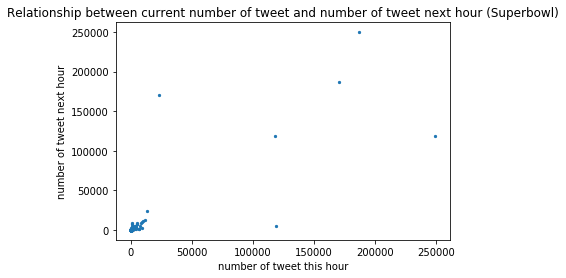

In [0]:
#superbowl
#x1 = tweet
plt.figure()
plt.scatter(df_superbowl['tweet'], df_superbowl['y'], s=5)
plt.xlabel('number of tweet this hour')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between current number of tweet and number of tweet next hour (Superbowl)')

Text(0.5,1,'Relationship between number of retweet and number of tweet next hour (Superbowl)')

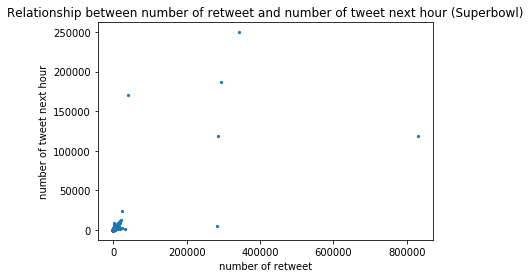

In [0]:
#x2 = retweet
plt.figure()
plt.scatter(df_superbowl['retweet'], df_superbowl['y'], s=5)
plt.xlabel('number of retweet')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between number of retweet and number of tweet next hour (Superbowl)')

Text(0.5,1,'Relationship between sum of hashtag count and number of tweet next hour (Superbowl)')

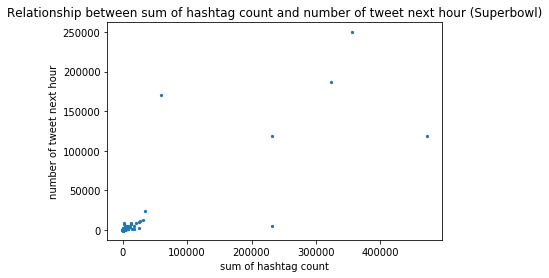

In [0]:
#x7 = sum_hashtag_count
plt.figure()
plt.scatter(df_superbowl['sum_hashtag_count'], df_superbowl['y'], s=5)
plt.xlabel('sum of hashtag count')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between sum of hashtag count and number of tweet next hour (Superbowl)')

Text(0.5,1,'Relationship between number of tweet this hour and number of tweet next hour (#gohawks)')

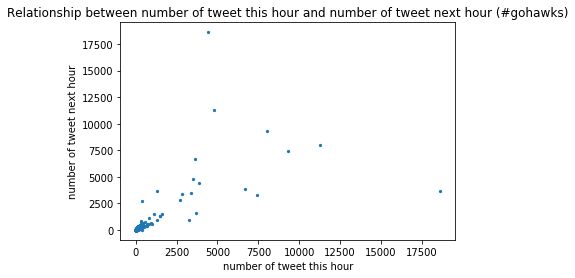

In [0]:
#go hawks
#x1
plt.figure()
plt.scatter(df_gohawks['tweet'], df_gohawks['y'], s=5)
plt.xlabel('number of tweet this hour')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between number of tweet this hour and number of tweet next hour (#gohawks)')

Text(0.5,1,'Relationship between sum of list count and number of tweet next hour (#gohawks)')

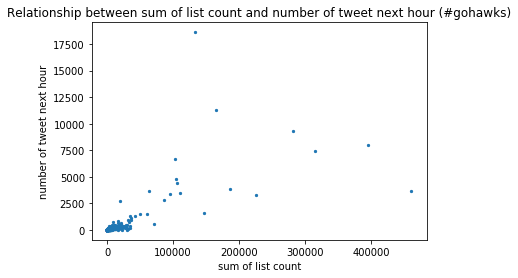

In [0]:
plt.figure()
plt.scatter(df_gohawks['sum_listed_count'], df_gohawks['y'], s=5)
plt.xlabel('sum of list count')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between sum of list count and number of tweet next hour (#gohawks)')

Text(0.5,1,'Relationship between sum of hashtag count and number of tweet next hour (#gohawks)')

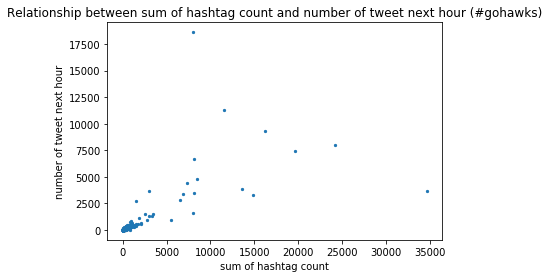

In [0]:
plt.figure()
plt.scatter(df_gohawks['sum_hashtag_count'], df_gohawks['y'], s=5)
plt.xlabel('sum of hashtag count')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between sum of hashtag count and number of tweet next hour (#gohawks)')

Text(0.5,1,'Relationship between number of tweet this hour and number of tweet next hour (#gopatriots)')

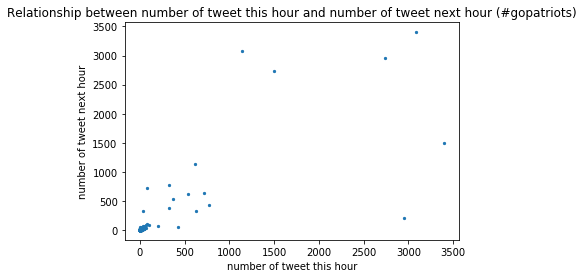

In [0]:
#go patriots
#x1
plt.figure()
plt.scatter(df_gopatriots['tweet'], df_gopatriots['y'], s=5)
plt.xlabel('number of tweet this hour')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between number of tweet this hour and number of tweet next hour (#gopatriots)')

Text(0.5,1,'Relationship between sum of listed count and number of tweet next hour (#gopatriots)')

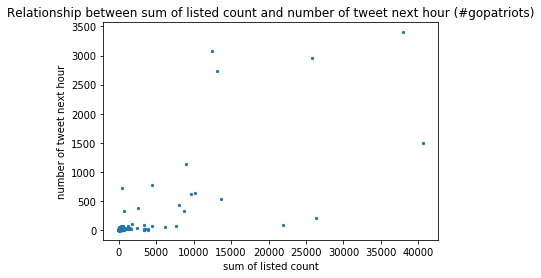

In [0]:
#sum_listed_count
plt.figure()
plt.scatter(df_gopatriots['sum_listed_count'], df_gopatriots['y'], s=5)
plt.xlabel('sum of listed count')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between sum of listed count and number of tweet next hour (#gopatriots)')

Text(0.5,1,'Relationship between sum of hashtag count and number of tweet next hour (#gopatriots)')

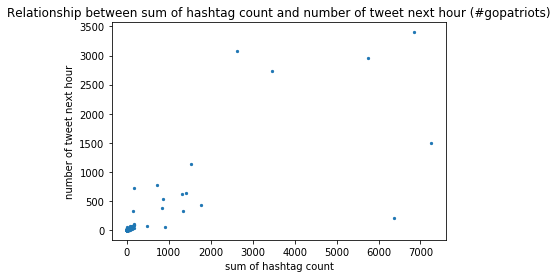

In [0]:
plt.figure()
plt.scatter(df_gopatriots['sum_hashtag_count'], df_gopatriots['y'], s=5)
plt.xlabel('sum of hashtag count')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between sum of hashtag count and number of tweet next hour (#gopatriots)')

Text(0.5,1,'Relationship between number of tweet this hour and number of tweet next hour (#nfl)')

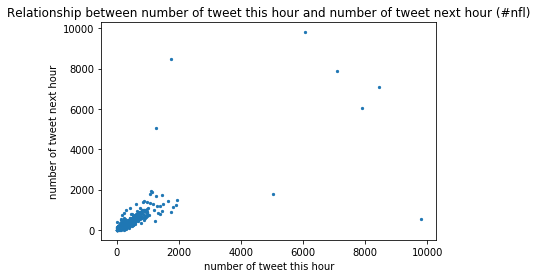

In [0]:
#nfl
plt.figure()
plt.scatter(df_nfl['tweet'], df_nfl['y'], s=5)
plt.xlabel('number of tweet this hour')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between number of tweet this hour and number of tweet next hour (#nfl)')

Text(0.5,1,'Relationship between number of retweet and number of tweet next hour (#nfl)')

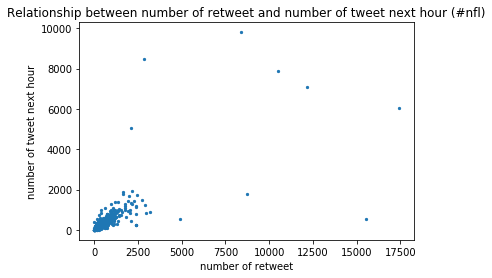

In [0]:
#nfl
plt.figure()
plt.scatter(df_nfl['retweet'], df_nfl['y'], s=5)
plt.xlabel('number of retweet')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between number of retweet and number of tweet next hour (#nfl)')

Text(0.5,1,'Relationship between sum of listed count and number of tweet next hour (#nfl)')

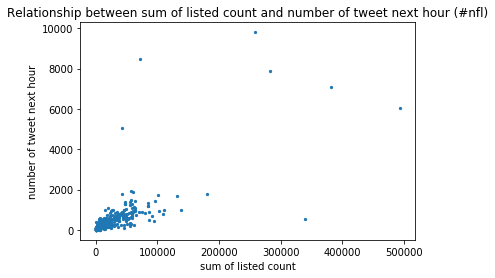

In [0]:
plt.figure()
plt.scatter(df_nfl['sum_listed_count'], df_nfl['y'], s=5)
plt.xlabel('sum of listed count')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between sum of listed count and number of tweet next hour (#nfl)')

Text(0.5,1,'Relationship between number of tweet this hour and number of tweet next hour (#patriots)')

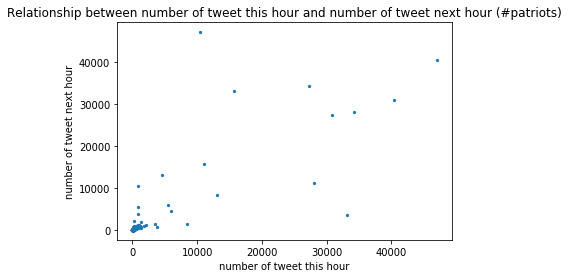

In [0]:
#patriots
plt.figure()
plt.scatter(df_patriots['tweet'], df_patriots['y'], s=5)
plt.xlabel('number of tweet this hour')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between number of tweet this hour and number of tweet next hour (#patriots)')

Text(0.5,1,'Relationship between number of retweet and number of tweet next hour (#patriots)')

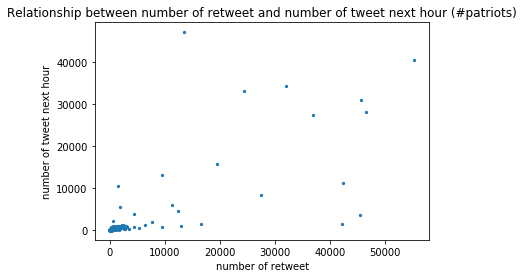

In [0]:
plt.figure()
plt.scatter(df_patriots['retweet'], df_patriots['y'], s=5)
plt.xlabel('number of retweet')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between number of retweet and number of tweet next hour (#patriots)')

Text(0.5,1,'Relationship between sum of listed count and number of tweet next hour (#patriots)')

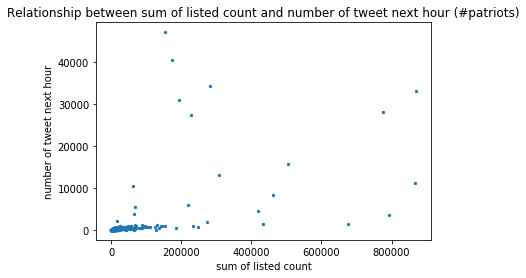

In [0]:
plt.figure()
plt.scatter(df_patriots['sum_listed_count'], df_patriots['y'], s=5)
plt.xlabel('sum of listed count')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between sum of listed count and number of tweet next hour (#patriots)')

Text(0.5,1,'Relationship between number of tweet this hour and number of tweet next hour (#sb49)')

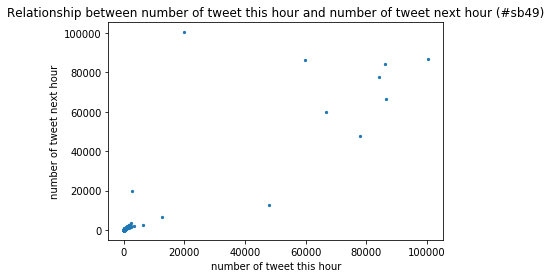

In [0]:
#sb49
plt.figure()
plt.scatter(df_sb49['tweet'], df_sb49['y'], s=5)
plt.xlabel('number of tweet this hour')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between number of tweet this hour and number of tweet next hour (#sb49)')

Text(0.5,1,'Relationship between maximum listed count and number of tweet next hour (#sb49)')

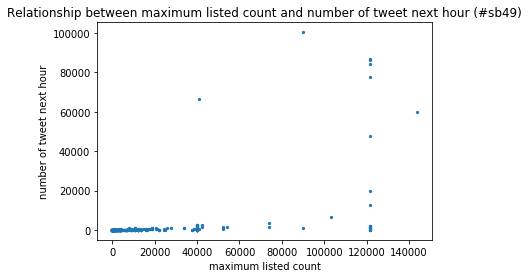

In [0]:
plt.figure()
plt.scatter(df_sb49['max_listed_count'], df_sb49['y'], s=5)
plt.xlabel('maximum listed count')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between maximum listed count and number of tweet next hour (#sb49)')

Text(0.5,1,'Relationship between sum of hashtag count and number of tweet next hour (#sb49)')

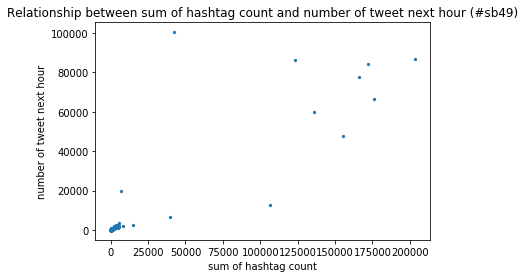

In [0]:
plt.figure()
plt.scatter(df_sb49['sum_hashtag_count'], df_sb49['y'], s=5)
plt.xlabel('sum of hashtag count')
plt.ylabel('number of tweet next hour')
plt.title('Relationship between sum of hashtag count and number of tweet next hour (#sb49)')

### 4. Piece-wise linear regression

QUESTION 6: We define three time periods and their corresponding window length as follows:
*  Before Feb. 1, 8:00 a.m.: 1-hour window
*  Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window 3. 
*  After Feb. 1, 8:00 p.m.: 1-hour window  

For each hashtag, train 3 regression models, one for each of these time periods (the times are all in PST). Report the MSE and R-squared score for each case.


In [0]:
# gohawks1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#gohawks.csv', parse_dates = ['time'])
# gopatriots1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#gopatriots.csv', parse_dates = ['time'])
# nfl1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#nfl.csv', parse_dates = ['time'])
# patriots1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#patriots.csv', parse_dates = ['time'])
# sb491 = pd.read_csv('./ECE219_tweet_data/extractedfeature#sb49.csv', parse_dates = ['time'])
# superbowl1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#superbowl.csv', parse_dates = ['time'])

In [0]:
def grouping(data, time_option):
  start = datetime.datetime(2015, 2, 1, 8, 0, 0).timestamp()
  end = datetime.datetime(2015, 2, 1, 20, 0, 0).timestamp()
  if(time_option == 'pre'):
    data_pre = data.loc[data['timestamp'] < start]
    df = data_pre.groupby(by=['month', 'day', 'hour']).agg({'tweet': sum,
                                                       'retweet': sum,
                                                       'followers': sum,
                                                       'listed_count': sum,
                                                       'hashtag_count': sum,
                                                       'rank_score': sum
                                                       })
    
  elif(time_option == 'feb1'):
    data_feb1 = data.loc[(data['timestamp'] >= start) & (data['timestamp'] <= end)]
    data_feb1.index = pd.to_datetime(data_feb1.time)
    df = data_feb1[['tweet', 'retweet', 'followers','listed_count','hashtag_count', 'rank_score']].resample('5T').sum()
    
  elif(time_option == 'post'):
    data_post = data.loc[data['timestamp'] > end]
    df = data_post.groupby(by=['month', 'day', 'hour']).agg({'tweet': sum,
                                                   'retweet': sum,
                                                   'followers': sum,
                                                   'listed_count': sum,
                                                   'hashtag_count': sum,
                                                   'rank_score': sum
                                                   })

  y = df.values[1:, 0]
  X = df.values[:-1, 0:]
  results = sm.OLS(y,X).fit()
  print(results.summary())
  print('MSE = ', results.mse_model)

In [0]:
grouping(gohawks1, 'pre')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     64.26
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           7.11e-57
Time:                        23:11:01   Log-Likelihood:                -3534.5
No. Observations:                 439   AIC:                             7081.
Df Residuals:                     433   BIC:                             7106.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -20.2142      4.246     -4.761      0.0

In [0]:
grouping(gohawks1, 'feb1')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     65.59
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           7.19e-38
Time:                        23:11:05   Log-Likelihood:                -1008.2
No. Observations:                 143   AIC:                             2028.
Df Residuals:                     137   BIC:                             2046.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4919      3.871     -0.127      0.8

In [0]:
grouping(gohawks1, 'post')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     92.57
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           7.12e-41
Time:                        23:11:08   Log-Likelihood:                -616.52
No. Observations:                 117   AIC:                             1245.
Df Residuals:                     111   BIC:                             1262.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.2383      4.527     -1.378      0.1

In [0]:
grouping(gopatriots1, 'pre')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     86.52
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           8.07e-68
Time:                        23:11:11   Log-Likelihood:                -2004.9
No. Observations:                 383   AIC:                             4022.
Df Residuals:                     377   BIC:                             4045.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.4502      2.579      2.114      0.0

In [0]:
grouping(gopatriots1, 'feb1')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     35.16
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           1.72e-25
Time:                        23:11:13   Log-Likelihood:                -892.81
No. Observations:                 143   AIC:                             1798.
Df Residuals:                     137   BIC:                             1815.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.9475      3.348      1.179      0.2

In [0]:
grouping(gopatriots1, 'post')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     33.81
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           8.77e-14
Time:                        23:11:16   Log-Likelihood:                -161.14
No. Observations:                  44   AIC:                             334.3
Df Residuals:                      38   BIC:                             345.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.1333      1.613     -1.323      0.1

In [0]:
grouping(nfl1, 'pre')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     153.4
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          7.81e-104
Time:                        23:11:18   Log-Likelihood:                -3063.6
No. Observations:                 439   AIC:                             6139.
Df Residuals:                     433   BIC:                             6164.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.2801      1.109      2.959      0.0

In [0]:
grouping(nfl1, 'feb1')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     236.6
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           1.02e-69
Time:                        23:11:22   Log-Likelihood:                -909.58
No. Observations:                 143   AIC:                             1831.
Df Residuals:                     137   BIC:                             1849.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.6411      2.289     -2.902      0.0

In [0]:
grouping(nfl1, 'post')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     351.5
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           2.62e-75
Time:                        23:11:25   Log-Likelihood:                -822.07
No. Observations:                 130   AIC:                             1656.
Df Residuals:                     124   BIC:                             1673.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4838      0.957     -0.506      0.6

In [0]:
grouping(patriots1, 'pre')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     107.5
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           1.47e-82
Time:                        23:11:27   Log-Likelihood:                -3426.3
No. Observations:                 439   AIC:                             6865.
Df Residuals:                     433   BIC:                             6889.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -8.9556      3.093     -2.895      0.0

In [0]:
grouping(patriots1, 'feb1')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           7.07e-60
Time:                        23:11:36   Log-Likelihood:                -1170.4
No. Observations:                 143   AIC:                             2353.
Df Residuals:                     137   BIC:                             2370.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.6952      1.448      1.862      0.0

In [0]:
grouping(patriots1, 'post')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     244.7
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           1.33e-67
Time:                        23:12:13   Log-Likelihood:                -803.19
No. Observations:                 134   AIC:                             1618.
Df Residuals:                     128   BIC:                             1636.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4967      1.104      0.450      0.6

In [0]:
grouping(sb491, 'pre')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     557.0
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          9.79e-186
Time:                        23:12:16   Log-Likelihood:                -2275.4
No. Observations:                 389   AIC:                             4563.
Df Residuals:                     383   BIC:                             4587.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.5501      0.712     -3.582      0.0

In [0]:
grouping(sb491, 'feb1')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     486.9
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           9.05e-90
Time:                        23:12:31   Log-Likelihood:                -1211.9
No. Observations:                 143   AIC:                             2436.
Df Residuals:                     137   BIC:                             2454.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4753      1.080      1.367      0.1

In [0]:
grouping(sb491, 'post')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     197.2
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           3.76e-62
Time:                        23:12:38   Log-Likelihood:                -913.63
No. Observations:                 134   AIC:                             1839.
Df Residuals:                     128   BIC:                             1857.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -16.8252      2.294     -7.335      0.0

In [0]:
grouping(superbowl1, 'pre')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     79.46
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           1.02e-66
Time:                        23:12:41   Log-Likelihood:                -3504.5
No. Observations:                 439   AIC:                             7021.
Df Residuals:                     433   BIC:                             7045.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.3041      1.881      1.225      0.2

In [0]:
grouping(superbowl1, 'feb1')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     463.9
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           2.15e-88
Time:                        23:13:44   Log-Likelihood:                -1304.1
No. Observations:                 143   AIC:                             2620.
Df Residuals:                     137   BIC:                             2638.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8981      2.702     -0.332      0.7

In [0]:
grouping(superbowl1, 'post')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           1.21e-62
Time:                        23:13:55   Log-Likelihood:                -970.04
No. Observations:                 134   AIC:                             1952.
Df Residuals:                     128   BIC:                             1969.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.8043      1.617     -2.353      0.0

QUESTION 7: Also, aggregate the data of all hashtags, and train 3 models (for the intervals mentioned above) to predict the number of tweets in the next hour on the aggregated data.
Perform the same evaluations on your combined model and compare with models you trained for individual hashtags.

In [0]:
def grouping_data(data, time_option):
  start = datetime.datetime(2015, 2, 1, 8, 0, 0).timestamp()
  end = datetime.datetime(2015, 2, 1, 20, 0, 0).timestamp()
  if(time_option == 'pre'):
    data_pre = data.loc[data['timestamp'] < start]
    df = data_pre.groupby(by=['month', 'day', 'hour']).agg({'tweet': sum,
                                                       'retweet': sum,
                                                       'followers': sum,
                                                       'listed_count': sum,
                                                       'hashtag_count': sum,
                                                       'rank_score': sum
                                                       })
    
  elif(time_option == 'feb1'):
    data_feb1 = data.loc[(data['timestamp'] >= start) & (data['timestamp'] <= end)]
    data_feb1.index = pd.to_datetime(data_feb1.time)
    df = data_feb1[['tweet', 'retweet', 'followers','listed_count','hashtag_count', 'rank_score']].resample('5T').sum()
    
  elif(time_option == 'post'):
    data_post = data.loc[data['timestamp'] > end]
    df = data_post.groupby(by=['month', 'day', 'hour']).agg({'tweet': sum,
                                                   'retweet': sum,
                                                   'followers': sum,
                                                   'listed_count': sum,
                                                   'hashtag_count': sum,
                                                   'rank_score': sum
                                                   })
  return df

In [0]:
gohawks1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#gohawks.csv')
gopatriots1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#gopatriots.csv')
nfl1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#nfl.csv')
patriots1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#patriots.csv')
sb491 = pd.read_csv('./ECE219_tweet_data/extractedfeature#sb49.csv')
superbowl1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#superbowl.csv')

In [0]:
data_pre = pd.concat([grouping_data(gohawks1, 'pre'),
                      grouping_data(gopatriots1, 'pre'),
                      grouping_data(nfl1, 'pre'),
                      grouping_data(patriots1, 'pre'),
                      grouping_data(sb491, 'pre'),
                      grouping_data(superbowl1, 'pre')])

In [0]:
data_post = pd.concat([grouping_data(gohawks1, 'post'),
                      grouping_data(gopatriots1, 'post'),
                      grouping_data(nfl1, 'post'),
                      grouping_data(patriots1, 'post'),
                      grouping_data(sb491, 'post'),
                      grouping_data(superbowl1, 'post')])

In [0]:
data_feb1 = pd.concat([grouping_data(gohawks1, 'feb1'),
                      grouping_data(gopatriots1, 'feb1'),
                      grouping_data(nfl1, 'feb1'),
                      grouping_data(patriots1, 'feb1'),
                      grouping_data(sb491, 'feb1'),
                      grouping_data(superbowl1, 'feb1')])

In [0]:
def ols_fitting(df):
  y = df.values[1:, 0]
  X = df.values[:-1, 0:]
  results = sm.OLS(y,X).fit()
  print(results.summary())
  print('MSE = ', results.mse_model)

In [0]:
ols_fitting(data_pre)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     367.9
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:37:08   Log-Likelihood:                -19588.
No. Observations:                2533   AIC:                         3.919e+04
Df Residuals:                    2527   BIC:                         3.922e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.3776      0.639     -5.286      0.0

In [0]:
ols_fitting(data_feb1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     2314.
Date:                Wed, 20 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:40:43   Log-Likelihood:                -7317.7
No. Observations:                 863   AIC:                         1.465e+04
Df Residuals:                     857   BIC:                         1.468e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.3026      0.342      6.741      0.0

In [0]:
ols_fitting(data_post)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     276.1
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          7.26e-180
Time:                        23:40:53   Log-Likelihood:                -5155.9
No. Observations:                 698   AIC:                         1.032e+04
Df Residuals:                     692   BIC:                         1.035e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.4566      0.830     -2.959      0.0

### 5. Nonlinear Regression

In [0]:
def aggr_data(data):
  df = data.groupby(by=['month', 'day', 'hour']).agg({'tweet': sum,
                                                      'retweet': sum,
                                                      'followers': sum,
                                                      'listed_count': sum,
                                                      'hashtag_count': sum,
                                                      'rank_score': sum
                                                     })
  return df

In [0]:
gohawks1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#gohawks.csv')
gopatriots1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#gopatriots.csv')
nfl1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#nfl.csv')
patriots1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#patriots.csv')
sb491 = pd.read_csv('./ECE219_tweet_data/extractedfeature#sb49.csv')
superbowl1 = pd.read_csv('./ECE219_tweet_data/extractedfeature#superbowl.csv')

In [0]:
#if using google drive
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

# gohawks1 = pd.read_csv('gdrive/My Drive/ECE219_tweet_data/extractedfeature#gohawks.csv')
# gopatriots1 = pd.read_csv('gdrive/My Drive/ECE219_tweet_data/extractedfeature#gopatriots.csv')
# nfl1 = pd.read_csv('gdrive/My Drive/ECE219_tweet_data/extractedfeature#nfl.csv')
# patriots1 = pd.read_csv('gdrive/My Drive/ECE219_tweet_data/extractedfeature#patriots.csv')
# sb491 = pd.read_csv('gdrive/My Drive/ECE219_tweet_data/extractedfeature#sb49.csv')
# superbowl1 = pd.read_csv('gdrive/My Drive/ECE219_tweet_data/extractedfeature#superbowl.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data_aggr = pd.concat([aggr_data(gohawks1),
                      aggr_data(gopatriots1),
                      aggr_data(nfl1),
                      aggr_data(patriots1),
                      aggr_data(sb491),
                      aggr_data(superbowl1)])

In [0]:
data_aggr.head()

tweet  retweet  followers  listed_count  hashtag_count  \
month day hour                                                           
1     14  0        29      459    23814.0       29608.0             62   
          1        13       32     7774.0        6640.0             39   
          2        14      378    26891.0        7215.0             52   
          3         9       28    19094.0         268.0             23   
          4        24       62    31949.0        3240.0             50   

                rank_score  
month day hour              
1     14  0     115.635633  
          1      51.273417  
          2      62.687126  
          3      39.823378  
          4     101.774310

In [0]:
y_aggr = data_aggr.values[1:, 0]
X_aggr = data_aggr.values[:-1, 0:]

In [0]:
ols_fitting(data_aggr)

In [0]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gs_params = {
  'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
  'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10],
  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
cv = KFold(5, shuffle=True, random_state=42)
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

gs_rfr = GridSearchCV(rfr,param_grid=gs_params,cv=cv,scoring='neg_mean_squared_error',n_jobs=-1)
gs_gbr = GridSearchCV(gbr,param_grid=gs_params,cv=cv,scoring='neg_mean_squared_error',n_jobs=-1)

In [0]:
gs_rfr.fit(X_aggr, y_aggr)

In [0]:
pd.DataFrame(gs_rfr.cv_results_)

In [0]:
gs_gbr.fit(X_aggr, y_aggr)
pd.DataFrame(gs_gbr.cv_results_)

In [0]:
#best estimator
print(gs_rfr.best_estimator_)

In [0]:
print(gs_gbr.best_estimator_)

In [0]:
print(gs_rfr.best_params_)

In [0]:
print(gs_gbr.best_params_)

Question 10:

In [0]:
def grid_search_fit(data, method):
  y = data.values[1:, 0]
  X = data.values[:-1, 0:]
  
  gs_params = {
      'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [1, 2, 4],
      'min_samples_split': [2, 5, 10],
      'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
  }
  cv = KFold(5, shuffle=True, random_state=42)
  
  if(method == 'Gradient Boosting'):
    algo = GradientBoostingRegressor()
  elif(method == 'Random Forest'):
    algo = RandomForestRegressor()
  gs = GridSearchCV(algo,param_grid=gs_params,cv=cv,scoring='neg_mean_squared_error',n_jobs=-1)
  gs.fit(X, y)
  print(pd.DataFrame(gs.cv_results_))
  print(gs.best_estimator_)
  print(gs.best_params_)

In [0]:
grid_search_fit(data_pre, 'Gradient Boosting')

In [0]:
grid_search_fit(data_feb1, 'Gradient Boosting')

In [0]:
grid_search_fit(data_post, 'Gradient Boosting')

### Neural Network

In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

def mlp_gridsearch(data, scale):
  y = data.values[1:, 0]
  if(scale == 'True'):
    scalar = StandardScaler()
    X = scalar.fit_transform(data.values[:-1, 0:])
  elif(scale == 'False'):
    X = data.values[:-1, 0:]
    
  mlp_params = {
      'hidden_layer_sizes': [(100,), (50,), (50,50), (100,25), (50, 20, 20)]
  }
  mlp = MLPRegressor()
  gs_mlp = GridSearchCV(mlp,param_grid=mlp_params,cv=cv,scoring='neg_mean_squared_error',n_jobs=-1)
  gs_mlp.fit(X, y)
  print(pd.DataFrame(gs_mlp.cv_results_))
  print(gs_mlp.best_estimator_)
  print(gs_mlp.best_params_)

In [0]:
mlp_gridsearch(data_aggr, 'False')

In [0]:
#Q12
from sklearn.metrics import mean_squared_error
scalar = StandardScaler()
y_aggr_s = data_aggr.values[1:, 0]
X_aggr_s = scalar.fit_transform(data_aggr.values[:-1, 0:])

best_mlp = MLPRegressor(hidden_layer_sizes = (50, 20, 20))
best_mlp.fit(X_aggr_s, y_aggr_s)
y_pred = best_mlp.predict(X_aggr_s)

mse = mean_squared_error(y_aggr_s, y_pred)
print(mse)

In [0]:
#Q13
mlp_gridsearch(data_pre, 'True')

In [0]:
mlp_gridsearch(data_feb1, 'True')

In [0]:
mlp_gridsearch(data_post, 'True')

In [0]:
def grouping_data_6(data, time_option):
  start = datetime.datetime(2015, 2, 1, 8, 0, 0).timestamp()
  end = datetime.datetime(2015, 2, 1, 20, 0, 0).timestamp()
  if(time_option == 'pre'):
    data_pre = data.loc[data['timestamp'] < start]
    data_pre['6h'] = data['hour'] // 6
    df = data_pre.groupby(by=['month', 'day', '6h']).agg({'tweet': sum,
                                                       'retweet': sum,
                                                       'followers': sum,
                                                       'listed_count': sum,
                                                       'hashtag_count': sum,
                                                       'rank_score': sum
                                                       })
    
  elif(time_option == 'feb1'):
    data_feb1 = data.loc[(data['timestamp'] >= start) & (data['timestamp'] <= end)]
    data_feb1.index = pd.to_datetime(data_feb1.time)
    df = data_feb1[['tweet', 'retweet', 'followers','listed_count','hashtag_count', 'rank_score']].resample('30T').sum()
    
  elif(time_option == 'post'):
    data_post = data.loc[data['timestamp'] > end]
    data_post['6h'] = data['hour'] // 6
    df = data_post.groupby(by=['month', 'day', '6h']).agg({'tweet': sum,
                                                   'retweet': sum,
                                                   'followers': sum,
                                                   'listed_count': sum,
                                                   'hashtag_count': sum,
                                                   'rank_score': sum
                                                   })
  return df

In [0]:
def grouping_test_data_6(data, time_option):
    if(time_option == 'pre'):
      df = data.agg({'tweet': sum,
                     'retweet': sum,
                     'followers': sum,
                     'listed_count': sum,
                     'hashtag_count': sum,
                     'rank_score': sum
                     })

    elif(time_option == 'feb1'):
      data_feb1 = data
      data_feb1.index = pd.to_datetime(data.time)
      df = data_feb1[['tweet', 'retweet', 'followers','listed_count','hashtag_count', 'rank_score']].sum()

    elif(time_option == 'post'):
      df = data.agg({'tweet': sum,
                     'retweet': sum,
                     'followers': sum,
                     'listed_count': sum,
                     'hashtag_count': sum,
                     'rank_score': sum
                     })
    return df

In [0]:
data_pre_6 = pd.concat([grouping_data_6(gohawks1, 'pre'),
                      grouping_data_6(gopatriots1, 'pre'),
                      grouping_data_6(nfl1, 'pre'),
                      grouping_data_6(patriots1, 'pre'),
                      grouping_data_6(sb491, 'pre'),
                      grouping_data_6(superbowl1, 'pre')])

In [0]:
data_post_6 = pd.concat([grouping_data_6(gohawks1, 'post'),
                        grouping_data_6(gopatriots1, 'post'),
                        grouping_data_6(nfl1, 'post'),
                        grouping_data_6(patriots1, 'post'),
                        grouping_data_6(sb491, 'post'),
                        grouping_data_6(superbowl1, 'post')])

In [0]:
data_feb1_6 = pd.concat([grouping_data_6(gohawks1, 'feb1'),
                    grouping_data_6(gopatriots1, 'feb1'),
                    grouping_data_6(nfl1, 'feb1'),
                    grouping_data_6(patriots1, 'feb1'),
                    grouping_data_6(sb491, 'feb1'),
                    grouping_data_6(superbowl1, 'feb1')])

In [0]:
def get_file_new_feature_test(file_path):
  timestamp = []
  tweet = []
  retweet = []
  followers = []
  time = []
  month = []
  day = []
  hour = []
  location = []
  favorited = []
  followers_count = []
  listed_count = []
  statuses_count = []
  hashtag_count = []
  rank_score = []
  pst_tz = pytz.timezone('America/Los_Angeles')

  with open(file_path, 'r') as json_file:  
    for line in json_file:
      data = json.loads(line)
      timestamp.append(data['citation_date'])
      tweet.append(1)
      retweet.append(data['metrics']['citations']['total'])
      followers.append(data['author']['followers'])
      time.append(datetime.datetime.fromtimestamp(data['citation_date'], pst_tz))
      month.append(datetime.datetime.fromtimestamp(data['citation_date'], pst_tz).month)
      day.append(datetime.datetime.fromtimestamp(data['citation_date'], pst_tz).day)
      hour.append(datetime.datetime.fromtimestamp(data['citation_date'], pst_tz).hour)
      location.append(data['tweet']['user']['location'])
      favorited.append(data['tweet']['favorited'])
      followers_count.append(data['tweet']['user']['followers_count'])
      listed_count.append(data['tweet']['user']['listed_count'])
      statuses_count.append(data['tweet']['user']['statuses_count'])
      hashtag_count.append(data['title'].count('#'))
      rank_score.append(data['metrics']['ranking_score'])
    df = pd.DataFrame({
        'tweet': tweet,
        'timestamp': timestamp,
        'retweet': retweet,
        'followers': followers,
        'time': time,
        'month': month,
        'day': day,
        'hour': hour,
        'location': location,
        'favorited': favorited,
        'follwers_count': followers_count,
        'listed_count': listed_count,
        'statuses_count': statuses_count,
        'hashtag_count': hashtag_count,
        'rank_score': rank_score
    }, columns = ['tweet', 'timestamp', 'retweet', 'followers', 'time', 'month', 'day', 'hour',
                 'location','favorited','followers_count','listed_count', 'statuses_count', 'hashtag_count','rank_score'])
    
    df.to_csv('./ECE219_tweet_test/extractedfeature'+file_path[-19:-4]+'.csv', index = False,encoding='utf-8')

In [0]:
get_file_new_feature_test('./ECE219_tweet_test/sample0_period1.txt')
get_file_new_feature_test('./ECE219_tweet_test/sample0_period2.txt')
get_file_new_feature_test('./ECE219_tweet_test/sample0_period3.txt')
get_file_new_feature_test('./ECE219_tweet_test/sample1_period1.txt')
get_file_new_feature_test('./ECE219_tweet_test/sample1_period2.txt')
get_file_new_feature_test('./ECE219_tweet_test/sample1_period3.txt')
get_file_new_feature_test('./ECE219_tweet_test/sample2_period1.txt')
get_file_new_feature_test('./ECE219_tweet_test/sample2_period2.txt')
get_file_new_feature_test('./ECE219_tweet_test/sample2_period3.txt')

In [0]:
s0p1 = grouping_test_data_6(pd.read_csv('./ECE219_tweet_test/extractedfeaturesample0_period1.csv'),'pre')
s0p2 = grouping_test_data_6(pd.read_csv('./ECE219_tweet_test/extractedfeaturesample0_period2.csv'),'feb1')
s0p3 = grouping_test_data_6(pd.read_csv('./ECE219_tweet_test/extractedfeaturesample0_period3.csv'),'post')
s1p1 = grouping_test_data_6(pd.read_csv('./ECE219_tweet_test/extractedfeaturesample1_period1.csv'),'pre')
s1p2 = grouping_test_data_6(pd.read_csv('./ECE219_tweet_test/extractedfeaturesample1_period2.csv'),'feb1')
s1p3 = grouping_test_data_6(pd.read_csv('./ECE219_tweet_test/extractedfeaturesample1_period3.csv'),'post')
s2p1 = grouping_test_data_6(pd.read_csv('./ECE219_tweet_test/extractedfeaturesample2_period1.csv'),'pre')
s2p2 = grouping_test_data_6(pd.read_csv('./ECE219_tweet_test/extractedfeaturesample2_period2.csv'),'feb1')
s2p3 = grouping_test_data_6(pd.read_csv('./ECE219_tweet_test/extractedfeaturesample2_period3.csv'),'post')

In [0]:
y_pre = data_pre_6.values[1:, 0]
X_pre = scalar.fit_transform(data_pre_6.values[:-1, 0:])

best_mlp = MLPRegressor(hidden_layer_sizes = (50, 20, 20))
best_mlp.fit(X_pre, y_pre)
print("Predicition for S0P1: ")
print(best_mlp.predict(scalar.transform(s0p1.values.reshape(-1, 1).T)))
print("Predicition for S1P1: ")
print(best_mlp.predict(scalar.transform(s1p1.values.reshape(-1, 1).T)))
print("Predicition for S3P1: ")
print(best_mlp.predict(scalar.transform(s2p1.values.reshape(-1, 1).T)))

In [0]:
y_feb1 = data_feb1_6.values[1:, 0]
X_feb1 = scalar.fit_transform(data_feb1_6.values[:-1, 0:])

best_mlp = MLPRegressor(hidden_layer_sizes = (50, 20, 20))
best_mlp.fit(X_feb1, y_feb1)
print("Predicition for S0P2: ")
print(best_mlp.predict(scalar.transform(s0p2.values.reshape(-1, 1).T)))
print("Predicition for S1P2: ")
print(best_mlp.predict(scalar.transform(s1p2.values.reshape(-1, 1).T)))
print("Predicition for S3P2: ")
print(best_mlp.predict(scalar.transform(s2p2.values.reshape(-1, 1).T)))

In [0]:
y_post = data_post_6.values[1:, 0]
X_post = scalar.fit_transform(data_post_6.values[:-1, 0:])

best_mlp = MLPRegressor(hidden_layer_sizes = (50, 20, 20))
best_mlp.fit(X_post, y_post)
print("Predicition for S0P3: ")
print(best_mlp.predict(scalar.transform(s0p3.values.reshape(-1, 1).T)))
print("Predicition for S1P3: ")
print(best_mlp.predict(scalar.transform(s1p3.values.reshape(-1, 1).T)))
print("Predicition for S2P3: ")
print(best_mlp.predict(scalar.transform(s2p3.values.reshape(-1, 1).T)))